# Protocol test

# for protocol test

In [4]:
import numpy as np
from sus.protocol_designer import System, Protocol, Potential, Compound_Protocol
from sus.protocol_designer.protocol import sequential_protocol
from IPython.display import HTML
from quick_sim import setup_sim
from edward_tools.coupled_fq_potential import coupled_flux_qubit_pot, coupled_flux_qubit_force, coupled_fq_pot
from edward_tools import cfq_runner as coupled_fq_runner
from edward_tools.visualization import animate_sim_flux_qubit

import kyle_tools as kt
import matplotlib.pyplot as plt
import importlib
from edward_tools import coupled_fq_protocol_library, cfq_runner

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [112]:
I_p_1 = 2e-6       # Amp
I_p_2 = 2e-6       # Amp
I_m_1 = 7e-9       # Amp
I_m_2 = 7e-9       # Amp
R_1 = 371          # ohm
R_2 = 500          # ohm
C_1 = 4e-9         # F
C_2 = 5e-9         # F
L_1 = 1e-9         # H
L_2 = 1e-9         # H

M_12_factor = 0
M_12 = L_1 * L_2 * M_12_factor
PHI_0 = 2.067833848 * 1e-15



quick_doubler = lambda x1, x2: np.hstack([np.array([x1] * 2), np.array([x2]*2)])

I_p = quick_doubler(I_p_1, I_p_2)
I_m = quick_doubler(I_m_1, I_m_2)
R = quick_doubler(R_1, R_2)
L = quick_doubler(L_1, L_2)
C = quick_doubler(C_1, C_2)

m = np.array([1, 1/4, 1, 1/4])
nu = np.array([2, 1/2, 2, 1/2]) 
kepa = np.array([1, 1, 1, 1])


beta_1 = 2 * np.pi * L_1 * I_p_1 / PHI_0
beta_2 = 2 * np.pi * L_2 * I_p_2 / PHI_0

d_beta_1 = 2 * np.pi * L_1 * I_m_1 / PHI_0
d_beta_2 = 2 * np.pi * L_2 * I_m_2 / PHI_0



_lambda = np.sqrt(L*C)/(R*C)  * nu
_theta  = 1 / m
_eta = np.sqrt(_lambda * kepa / m)


_lambda = 1
_theta  = 1
_eta = 1

params = {}
params['N'] = 100
params['dt'] = 1/1_000
params['lambda'] = 1
params['beta'] = 1
params['sim_params'] = [_lambda, _theta, _eta]
params['tau'] = 40
params['target_work'] = None

In [39]:
from edward_tools import coupled_fq_protocol_library
coupled_fq_protocol_library = importlib.reload(coupled_fq_protocol_library)
create_system = coupled_fq_protocol_library.create_system
get_potential_shot_at_different_t = coupled_fq_protocol_library.get_potential_shot_at_different_t
customizedProtocol = coupled_fq_protocol_library.customizedProtocol

In [40]:
protocol_list = [
    {"duration": 10, "phi_1_x": 2, "phi_2_x": 5, "M_12": 1},
    {"duration": 10, "phi_1_x": 2, "phi_2_x": 1, "M_12": 0.5},
    {"duration": 10, "phi_1_dcx": 3},
    {"duration": 10, "phi_1_dcx": 0},
]


In [51]:
manual_domain=[[-5, -5], [5, 5]]
phi_1_dcx, phi_2_dcx = 0, 0
phi_1_dc, phi_2_dc = phi_1_dcx , phi_2_dcx 
d_beta_1, d_beta_2, gamma = 0, 0, 20

initial_parameter_dict = {
        "U0_1": 1,     "U0_2": 1,     "gamma_1": gamma,  "gamma_2": gamma,
        "beta_1": beta_1,   "beta_2": beta_2,   "d_beta_1": d_beta_1 ,   "d_beta_2": d_beta_2,
        "phi_1_x": 0,  "phi_2_x": 0,  "phi_1_dcx": phi_1_dcx,  "phi_2_dcx": phi_2_dcx,
        "M_12": 0
}

protocol_list = [
    {"duration": 10, "M_12": 0.1}
]

computation_protocol_parameter_dict = coupled_fq_protocol_library.customizedProtocol(initial_parameter_dict,\
                                                                                    protocol_list)
storage_protocol, comp_protocol = create_system(computation_protocol_parameter_dict)
cfqr = coupled_fq_runner.coupledFluxQubitRunner(params = params, storage_protocol= storage_protocol, \
                                computation_protocol= comp_protocol)
cfqr.initialize_sim()


6.07706979287205

In [367]:
manual_domain=[[-5, -5], [5, 5]]
# phi_1_dcx, phi_2_dcx = 3, 3
phi_1_dcx, phi_2_dcx = 4, 0
# phi_1_dc, phi_2_dc = 1, 1
gamma = 20
# d_beta_1, d_beta_2 = 0.6, 0.6
d_beta_1, d_beta_2 = 0, 0

initial_parameter_dict = {
        "U0_1": 1,     "U0_2": 1,     "gamma_1": gamma,  "gamma_2": gamma,
        "beta_1": beta_1,   "beta_2": beta_2,   "d_beta_1": d_beta_1 ,   "d_beta_2": d_beta_2,
        "phi_1_x": 0,  "phi_2_x": 0,  "phi_1_dcx": phi_1_dcx,  "phi_2_dcx": phi_2_dcx,
        "M_12": 0
}

initial_parameter_dict = {'U0_1': 1,
 'U0_2': 1,
 'gamma_1': 20,
 'gamma_2': 20,
 'beta_1': 6.07706979287205,
 'beta_2': 6.07706979287205,
 'd_beta_1': 0,
 'd_beta_2': 0,
 'phi_1_x': 0,
 'phi_2_x': 0,
 'phi_1_dcx': 4,
 'phi_2_dcx': 0,
 'M_12': 2,
}



protocol_list = [
    {"duration": 0.1, "M_12": 0},
    {"duration": 2},
]


computation_protocol_parameter_dict = coupled_fq_protocol_library.customizedProtocol(initial_parameter_dict, protocol_list)
storage_protocol, comp_protocol = create_system(computation_protocol_parameter_dict)
cfqr = coupled_fq_runner.coupledFluxQubitRunner(params = params, storage_protocol= storage_protocol, \
                                computation_protocol= comp_protocol)
cfqr.initialize_sim()


{'M_12': [2, 0, 0], 't': [0, 0.1, 2.1]}
[0, 0.1, 2.1]
[0, 0.1, 2.1]
[0, 0.1, 2.1]


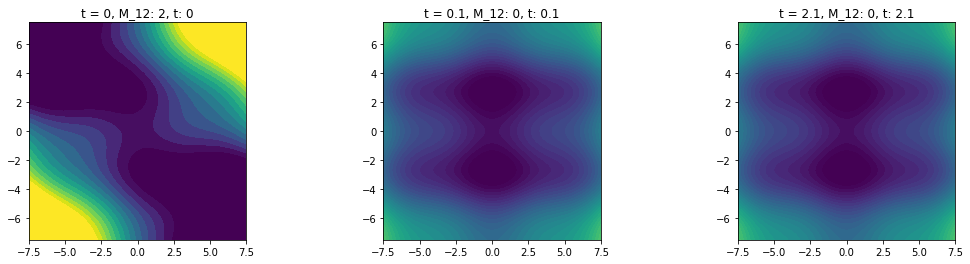

In [368]:

coupled_fq_protocol_library = importlib.reload(coupled_fq_protocol_library)
get_potential_shot_at_different_t = coupled_fq_protocol_library.get_potential_shot_at_different_t

vmin,vmax  = 0, 80
# vmin, vmax = None, None
manual_domain=[[-10, -10], [10, 10]]

square_bound = 7.5
manual_domain=[[-square_bound, -square_bound], [square_bound, square_bound]]


get_potential_shot_at_different_t(cfqr, computation_protocol_parameter_dict, axis1 = 0, axis2 = 1,\
                                  manual_domain=manual_domain, timeStep = None,
                                  slice_values = [0, 0, phi_1_dcx, phi_2_dcx], surface=False, contours = 40,
                                  vmin = vmin, vmax = vmax
                                  )

In [336]:
print(initial_parameter_dict)

{'U0_1': 1, 'U0_2': 1, 'gamma_1': 20, 'gamma_2': 20, 'beta_1': 6.07706979287205, 'beta_2': 6.07706979287205, 'd_beta_1': 0, 'd_beta_2': 0, 'phi_1_x': 0, 'phi_2_x': 0, 'phi_1_dcx': 0, 'phi_2_dcx': 0, 'M_12': 0}


In [111]:
get_simulation_parameters(initial_parameter_dict, params)
    

{'U0_1': 1,
 'U0_2': 1,
 'gamma_1': 10,
 'gamma_2': 10,
 'beta_1': 6.07706979287205,
 'beta_2': 6.07706979287205,
 'd_beta_1': 0,
 'd_beta_2': 0,
 'phi_1_x': 0,
 'phi_2_x': 0,
 'phi_1_dcx': 0,
 'phi_2_dcx': 0,
 'M_12': 0,
 'N': 100,
 'dt': 0.001,
 'lambda': 1,
 'beta': 1,
 'sim_params': [1, 10, 1],
 'tau': 40,
 'target_work': None}

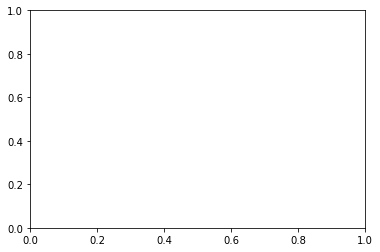

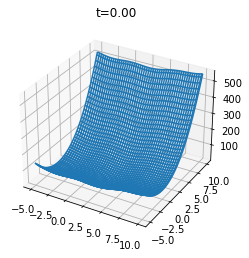

(<Axes3DSubplot:title={'center':'t=0.00'}>,
 <mpl_toolkits.mplot3d.art3d.Line3DCollection at 0x7fe7b204dfa0>)

In [74]:
cfqr.system.show_potential(0, surface = True, manual_domain=manual_domain, 
                           slice_values = [0, 0, phi_1_dc, phi_2_dc])

In [11]:
offset = 0.01
eq_state_manual_domain = [[-5, -5, phi_1_dcx * (1-offset), phi_2_dcx * (1-offset)],
                          [ 8,  8, phi_1_dcx * (1+offset), phi_2_dcx * (1+offset)]
                         ]


In [ ]:
cfqr.run_sim(init_state = None, manual_domain= eq_state_manual_domain, axes=[0, 1, 2, 3])


 initializing...
generating new initial_state


In [1]:
offset = 0.01
eq_state_manual_domain = [[-5, -5],
                          [ 8,  8]
                         ]


In [10]:
cfqr.run_sim(init_state = None, manual_domain= eq_state_manual_domain, axes=[0, 1], slice_va)


 initializing...
generating new initial_state
 found 129 samples out of 100from system: finish the while loop.
from cfq_runner.py, The as_tep is 20
from cfq_runner.py, The dt is 0.001
from quick_sim.py
[1, 10, 1]
from quick_sim.py
gamma: 1, theta: 10 and eta: 1.0
from quick_sim.py: system.protocol.t_f = 10.0, system.protocol.t_f = 0.0
This line is for the initializatoin of the simulation object.
number of steps: 10000, dt: 0.001

 running sim...
From simulation.py 9991 10000
From simulation.py 9992 10000
From simulation.py 9993 10000
From simulation.py 9994 10000
From simulation.py 9995 10000
From simulation.py 9996 10000
From simulation.py 9997 10000
From simulation.py 9998 10000
From simulation.py 9999 10000

 analyzing output...


In [110]:
def get_simulation_parameters(initial_parameter_dict, params):
    new_initial_parameter_dict = initial_parameter_dict.copy()
    for key in params.keys():
        new_initial_parameter_dict[key] = params[key]
    return new_initial_parameter_dict